## 决策树的学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

## 学习曲线
- 基于RMSE绘制学习曲线

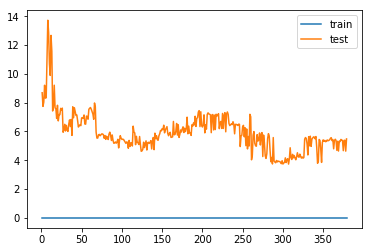

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.show()
    
plot_learning_curve(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

- 基于R^2值绘制学习曲线

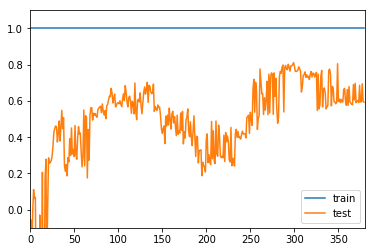

In [5]:
from sklearn.metrics import r2_score

def plot_learning_curve_r2(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(r2_score(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               train_score, label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               test_score, label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, -0.1, 1.1])
    plt.show()
    
plot_learning_curve_r2(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

- 以max_depth参数为例，看不同参数学习曲线的不同

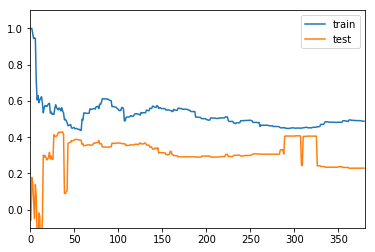

In [6]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=1), X_train, X_test, y_train, y_test)

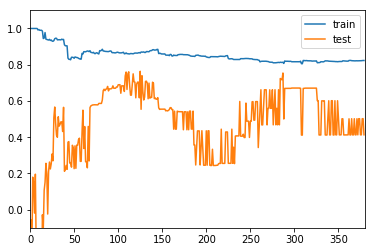

In [7]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=3), X_train, X_test, y_train, y_test)

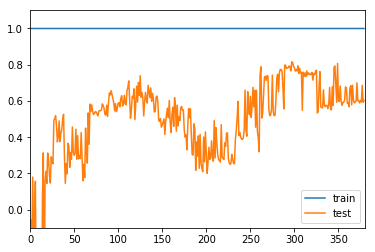

In [8]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=20), X_train, X_test, y_train, y_test)